### Homogeneous layers

In [4]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

freq = 3.0*constants.tera
l_0 = constants.c/freq
theta = 0.0

pc = TMM(freq, theta)

n_min, n_max = 2.0, 7.0
d_ratio = 0.1/n_max

n = np.array([1.5, 2.0])
d = np.array([l_0*d_ratio, l_0*d_ratio])

n_layer = 200
d_arr = np.ones(n_layer)*l_0*d_ratio/n_layer

n_0, n_1 = 1.0, 1.0


def f_T(n_arr):
    pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)
    T, R = pc.GetTransmissionReflection()
    return abs(T)



from Electromagnetics.Misc import *
from Electromagnetics.EvolAlgs import *

t_0 = tic()

res = geneticAlg(f_T, intervals=[(n_min, n_max)]*n_layer, 
                 n_bits=[10]*n_layer, pop_size=6000, n_gen=200, pr_cross=0.2, pr_mut=0.5, pr_bit_mut=0.1, maximize=False)

print('res: \n', res)

print("Processing time:", toc(t_0))




time_start:  302.331064
Start of evolution
-- End of (successful) evolution --
Best individual is [6.7165200391006845, 6.789833822091887, 5.875855327468231, 6.975562072336266, 6.887585532746823, 6.9853372434017595, 6.775171065493646, 6.159335288367546, 6.173998044965787, 6.560117302052785, 6.7702834799608995, 6.623655913978494, 6.496578690127077, 6.237536656891495, 6.5845552297165195, 6.848484848484849, 6.980449657869013, 6.320625610948191, 4.976539589442815, 6.628543499511241, 6.814271749755621, 6.604105571847507, 6.511241446725317, 6.613880742913, 6.843597262952102, 6.975562072336266, 5.299120234604105, 5.768328445747801, 6.828934506353861, 6.433040078201368, 5.880742913000978, 6.6383186705767345, 6.164222873900293, 6.266862170087976, 5.426197458455523, 5.729227761485826, 6.648093841642228, 6.27663734115347, 6.472140762463343, 6.809384164222874, 6.525904203323558, 6.804496578690127, 6.042033235581623, 6.926686217008798, 5.64613880742913, 6.780058651026393, 6.266862170087976, 6.472140

### Gradient layers

In [1]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *
from Electromagnetics.GMTM import GMTM1D_ML
import math
from numpy.random import random

n_min = 2.4
n_max = 6.4

freq = 100.0*constants.tera
l_0 = constants.c/freq/n_max/10
theta = 0.0

N_layer_gm = 10
conv = -1*np.ones(N_layer_gm)
s1 = -1*conv
s2 = 1*conv

n_0, n_1 = 1.0, 1.0

def f_gm(x):
    N = N_layer_gm
    
    d_barrier = l_0/N*(np.array(x[0:N]))
    y_barrier = 2.0*np.array(x[N:2*N])
    n0_barrier = n_min + (n_max-n_min)*np.array(x[2*N:3*N])

    gmtm = GMTM1D_ML()
    gmtm.SetProfileParameters(n0_barrier, y_barrier, d_barrier, s1, s2)
    gmtm.SetMediumParams(n_0, n_1)
    
    T, R, _ = gmtm.GetTransmissionReflection(freq)
    
    return abs(T)


from Electromagnetics.Misc import *
from Electromagnetics.EvolAlgs import *

t_0 = tic()

res = geneticAlg(f_gm, intervals=[(0.01, 1.0)]*3*N_layer_gm, 
                 n_bits=[10]*3*N_layer_gm, pop_size=300, n_gen=500, pr_cross=0.2, pr_mut=0.5, pr_bit_mut=0.1, maximize=False)

print('res: \n', res)

print("Processing time:", toc(t_0))



time_start:  1.176888
Start of evolution
-- End of (successful) evolution --
Best individual is [0.9883870967741936, 0.9903225806451613, 0.9661290322580646, 1.0, 0.9874193548387097, 0.9961290322580645, 0.9051612903225806, 0.9980645161290322, 1.0, 0.9883870967741936, 0.026451612903225806, 0.022580645161290325, 0.02064516129032258, 0.014838709677419355, 0.01096774193548387, 0.01096774193548387, 0.01870967741935484, 0.023548387096774193, 0.03806451612903226, 0.01096774193548387, 1.0, 1.0, 0.9835483870967742, 0.9758064516129032, 0.9980645161290322, 0.9970967741935484, 0.9767741935483871, 0.9835483870967742, 0.9970967741935484, 0.9990322580645161], (0.48919003350821144,)
res: 
 [[0.9883870967741936, 0.9903225806451613, 0.9661290322580646, 1.0, 0.9874193548387097, 0.9961290322580645, 0.9051612903225806, 0.9980645161290322, 1.0, 0.9883870967741936, 0.026451612903225806, 0.022580645161290325, 0.02064516129032258, 0.014838709677419355, 0.01096774193548387, 0.01096774193548387, 0.018709677419354

n_avg:  2.24864843982
Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


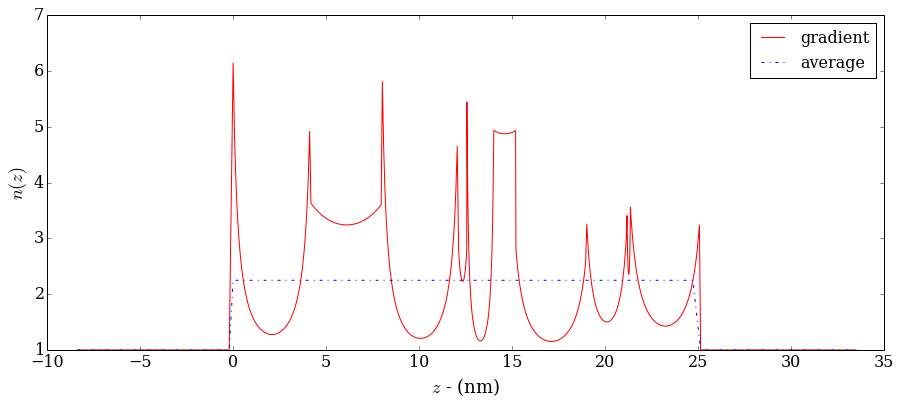

In [5]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *
from Electromagnetics.GMTM import GMTM1D_ML
import math
from numpy.random import random

x = res[0]
#x = np.random.random(3*N_layer_gm)

N = N_layer_gm
d_barrier = l_0/N*(np.array(x[0:N]))
y_barrier = 2.0*np.array(x[N:2*N])
n0_barrier = n_min + (n_max-n_min)*np.array(x[2*N:3*N])

gmtm = GMTM1D_ML()
gmtm.SetProfileParameters(n0_barrier, y_barrier, d_barrier, s1, s2)
gmtm.SetMediumParams(n_0, n_1)


pc = TMM(freq, theta=0.0)
pc_avg = TMM(freq, theta=0.0)    ## multilayer replaced with an average homogeneous slab


n_layer_tmm = 100
n_p, d_p = [], []
for i in range(len(d_barrier)):
    n_p_i, d_p_i = pc.StaircaseGradientBarrier1D(n0_barrier[i], y_barrier[i], d_barrier[i], s1[i], s2[i], n_layer_tmm)
    n_p = n_p + list(n_p_i)
    d_p = d_p + list(d_p_i)
n_p = np.array(n_p)
d_p = np.array(d_p)

pc.SetupMultilayer(n_0, n_1, n_p, d_p)

gmtm = GMTM1D_ML()
gmtm.SetProfileParameters(n0_barrier, y_barrier, d_barrier, s1, s2)
gmtm.SetMediumParams(n_0, n_1)


n_avg = gmtm.GetnAverage()
print('n_avg: ', n_avg)
pc_avg.SetupMultilayer(n_0, n_1, [n_avg], [sum(d_barrier)])


plot_TMM = False
plot_AVG = True

%pylab inline

d_sides = d_barrier[0]*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60
[z_pts_tm, n_vec_tm] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[z_pts_gm, n_vec_gm] = gmtm.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[z_pts_avg, n_vec_avg] = pc_avg.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
            

figsize(15, 6)

fig = figure()
plot(z_pts_gm/constants.nano, np.real(n_vec_gm), 'r', label='gradient')
if plot_TMM:
    plot(z_pts_tm/constants.nano, np.real(n_vec_tm), 'b-.', label='staircased')
    #\plot(z_pts/constants.nano, np.imag(n_vec), 'b-.')
    
if plot_AVG:
    plot(z_pts_avg/constants.nano, np.real(n_vec_avg), 'b-.', label='average')
    #plot(z_pts_avg/constants.nano, np.imag(n_vec_avg), 'b-.')

xlabel('$z$ - (nm)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


ax = gca()
#ax.text(-d_sides, n_1*0.9, r'$y={}$'.format(y_barrier))
#ax.text(-d_sides, n_1*0.6, r'$E(z) forward$', color='red')
#ax.text(-d_sides, n_1*0.4, r'$E(z) backward$', color='blue')


import os
dir_name = './other/gradient/optimum'
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

savefig(dir_name + '/profile' + file_ext)
